In [22]:
# packages

# standard
import numpy as np
import pandas as pd
import seaborn as sns
import time

# plot
import matplotlib.pyplot as plt

from textblob import TextBlob

In [3]:
df = pd.read_csv('~/Desktop/SEM 6 Assign/DATA SCI/data_science.csv', dtype = {'place':object})
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [30]:
df.shape

(241386, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [6]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.413860e+05,2.413860e+05,241386.0,2.413860e+05,241386.000000,241386.000000,241386.000000,241386.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.529281e+17,9.528276e+17,530.0,2.346056e+16,1.356678,11.569076,27.964269,0.457102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.104049e+17,3.103971e+17,0.0,1.442948e+17,34.724170,140.701341,751.545541,0.498157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.333963e+09,7.333963e+09,530.0,1.300000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.326473e+17,7.325960e+17,530.0,3.691232e+07,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.975409e+17,9.974605e+17,530.0,3.547840e+08,0.000000,3.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.216005e+18,1.215739e+18,530.0,5.345640e+08,0.000000,9.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.406400e+18,1.406400e+18,530.0,1.378437e+18,5769.000000,24505.000000,150746.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tweet

0         What can be done?  - Never blindly trust an ab...
1         "We need a paradigm shift from model-centric t...
2         Using high-resolution satellite data and compu...
3         .@Stephenson_Data shares four steps that will ...
4         "Curricula is inherently brittle in a world wh...
                                ...                        
241381    Cda jobs data, Dec: employment rose in health,...
241382    RT @filiber: Have a Computer Science backgroun...
241383    @pop17 Heck with science. I've got empirical d...
241384    All in the....data RT @noahWG Dr. Petra provid...
241385    “The world of retail will always be a mix of a...
Name: tweet, Length: 241386, dtype: object

In [18]:
df.isnull().sum()

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
place              241032
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest         241386
dtype: int64

In [7]:
df2 = pd.DataFrame(df[['id','tweet']])
df2.head(10)

,id,tweet
0,1406400408545804288,What can be done? - Never blindly trust an ab...
1,1406390341176016897,"""We need a paradigm shift from model-centric t..."
2,1406386311481774083,Using high-resolution satellite data and compu...
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...
4,1406358632648818689,"""Curricula is inherently brittle in a world wh..."
5,1406350577756524555,Many common colour maps distort data through u...
6,1406344023254634499,@LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...
7,1406341015963799553,Register now and build your #HPEDiscover 2021 ...
8,1406335152247214089,What is #ModelOps vs. #MLOps? “ModelOps is key...
9,1406334476905500679,Demystifying #AI with 10 top applications: ht...


In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
# Removing Punctuations

import re

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df2['Tweet_punct'] = df2['tweet'].apply(lambda x: remove_punct(x))
df2.head(10)

,id,tweet,Tweet_punct
0,1406400408545804288,What can be done? - Never blindly trust an ab...,What can be done Never blindly trust an abst...
1,1406390341176016897,"""We need a paradigm shift from model-centric t...",We need a paradigm shift from modelcentric to ...
2,1406386311481774083,Using high-resolution satellite data and compu...,Using highresolution satellite data and comput...
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...,StephensonData shares four steps that will hel...
4,1406358632648818689,"""Curricula is inherently brittle in a world wh...",Curricula is inherently brittle in a world whe...
5,1406350577756524555,Many common colour maps distort data through u...,Many common colour maps distort data through u...
6,1406344023254634499,@LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...,LinkLabsInc IoTchannel Wow Wonderful Congratul...
7,1406341015963799553,Register now and build your #HPEDiscover 2021 ...,Register now and build your HPEDiscover Agend...
8,1406335152247214089,What is #ModelOps vs. #MLOps? “ModelOps is key...,What is ModelOps vs MLOps “ModelOps is key to ...
9,1406334476905500679,Demystifying #AI with 10 top applications: ht...,Demystifying AI with top applications httpst...


In [11]:
# Removing Links 

def remove_links(text1):
    text1 = " ".join(re.sub(r'http\S+', '', text1).split())
    return text1

df2['Tweet_links'] = df2['Tweet_punct'].apply(lambda x : remove_links(x))
df2.head(10)

,id,tweet,Tweet_punct,Tweet_links
0,1406400408545804288,What can be done? - Never blindly trust an ab...,What can be done Never blindly trust an abst...,What can be done Never blindly trust an abstra...
1,1406390341176016897,"""We need a paradigm shift from model-centric t...",We need a paradigm shift from modelcentric to ...,We need a paradigm shift from modelcentric to ...
2,1406386311481774083,Using high-resolution satellite data and compu...,Using highresolution satellite data and comput...,Using highresolution satellite data and comput...
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...,StephensonData shares four steps that will hel...,StephensonData shares four steps that will hel...
4,1406358632648818689,"""Curricula is inherently brittle in a world wh...",Curricula is inherently brittle in a world whe...,Curricula is inherently brittle in a world whe...
5,1406350577756524555,Many common colour maps distort data through u...,Many common colour maps distort data through u...,Many common colour maps distort data through u...
6,1406344023254634499,@LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...,LinkLabsInc IoTchannel Wow Wonderful Congratul...,LinkLabsInc IoTchannel Wow Wonderful Congratul...
7,1406341015963799553,Register now and build your #HPEDiscover 2021 ...,Register now and build your HPEDiscover Agend...,Register now and build your HPEDiscover Agenda...
8,1406335152247214089,What is #ModelOps vs. #MLOps? “ModelOps is key...,What is ModelOps vs MLOps “ModelOps is key to ...,What is ModelOps vs MLOps “ModelOps is key to ...
9,1406334476905500679,Demystifying #AI with 10 top applications: ht...,Demystifying AI with top applications httpst...,Demystifying AI with top applications ———— Big...


In [21]:
# Sentiment Analysis

sentiment = ''
def sentiment(text):
    blob = TextBlob(text)
    sent = blob.sentiment.polarity
    if sent > 0.5 :
        sentiment = 'pos'
    elif sent < 0.5 :
        sentiment = 'neg'
    else :
        sentiment = 'neutral'
    return sentiment

df2['Sentiment'] = df2['Tweet_links'].apply(lambda x : sentiment(x))
df2.head(10)

,id,tweet,Tweet_punct,Tweet_links,Sentiment
0,1406400408545804288,What can be done? - Never blindly trust an ab...,What can be done Never blindly trust an abst...,What can be done Never blindly trust an abstra...,neg
1,1406390341176016897,"""We need a paradigm shift from model-centric t...",We need a paradigm shift from modelcentric to ...,We need a paradigm shift from modelcentric to ...,neg
2,1406386311481774083,Using high-resolution satellite data and compu...,Using highresolution satellite data and comput...,Using highresolution satellite data and comput...,neg
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...,StephensonData shares four steps that will hel...,StephensonData shares four steps that will hel...,neg
4,1406358632648818689,"""Curricula is inherently brittle in a world wh...",Curricula is inherently brittle in a world whe...,Curricula is inherently brittle in a world whe...,neg
5,1406350577756524555,Many common colour maps distort data through u...,Many common colour maps distort data through u...,Many common colour maps distort data through u...,neg
6,1406344023254634499,@LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...,LinkLabsInc IoTchannel Wow Wonderful Congratul...,LinkLabsInc IoTchannel Wow Wonderful Congratul...,pos
7,1406341015963799553,Register now and build your #HPEDiscover 2021 ...,Register now and build your HPEDiscover Agend...,Register now and build your HPEDiscover Agenda...,neg
8,1406335152247214089,What is #ModelOps vs. #MLOps? “ModelOps is key...,What is ModelOps vs MLOps “ModelOps is key to ...,What is ModelOps vs MLOps “ModelOps is key to ...,neg
9,1406334476905500679,Demystifying #AI with 10 top applications: ht...,Demystifying AI with top applications httpst...,Demystifying AI with top applications ———— Big...,neg


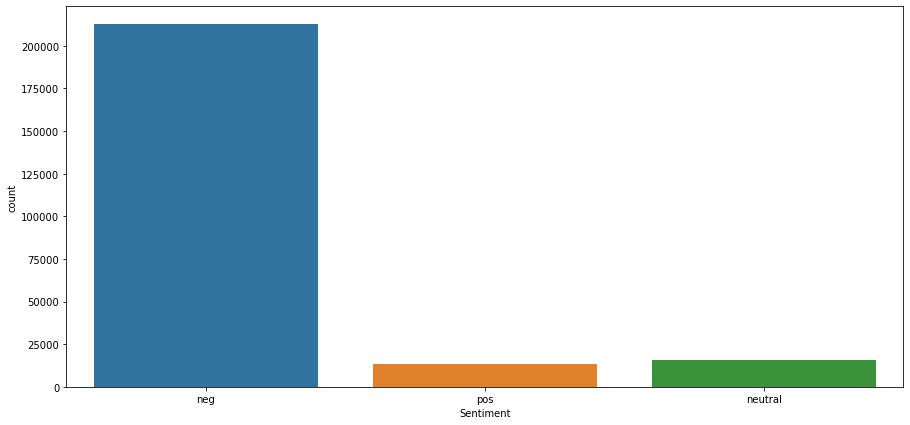

In [49]:
# Countplot

fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x = 'Sentiment', data = df2)
plt.show()

In [31]:
# Rate of positive tweets

positive = df2.loc[df2.Sentiment == 'pos']
rate_pos = (len(positive) / 241386 )*100
print('% of positive tweets = ',rate_pos)

% of positive tweets =  5.576959724259071


In [32]:
# Rate of negative tweets

negative = df2.loc[df2.Sentiment == 'neg']
rate_neg = (len(negative) / 241386 )*100
print('% of negative tweets = ',rate_neg)

% of negative tweets =  88.0167035370734


In [34]:
# Rate of neutral tweets

neutral = df2.loc[df2.Sentiment == 'neutral']
rate_neu = (len(neutral) / 241386 )*100
print('% of neutral tweets = ',rate_neu)

% of neutral tweets =  6.4063367386675285


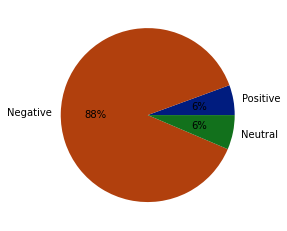

In [48]:
# Piechart

data = [rate_pos,rate_neg,rate_neu]
label = ['Positive', 'Negative', 'Neutral']
palette_color = sns.color_palette('dark')
plt.pie(data , labels = label, colors=palette_color, autopct='%.0f%%')
plt.show()